In [177]:
import pandas as pd                                       # 😀 Importa la biblioteca pandas y la renombra como pd para su uso en el código.
import matplotlib.pyplot as plt                           # 📊 Importa la biblioteca matplotlib.pyplot y la renombra como plt para su uso en el código.
import numpy as np                                        # 🔢 Importa la biblioteca numpy y la renombra como np para su uso en el código.
from keras.callbacks import ModelCheckpoint               # 💾 Importa la clase ModelCheckpoint desde keras.callbacks para guardar el modelo durante el entrenamiento.
from keras.callbacks import Callback                      # 🔄 Importa la clase Callback desde keras.callbacks para personalizar el comportamiento durante el entrenamiento.
import warnings                                           # ⚠️ Importa la biblioteca warnings para manejar advertencias.
from sklearn import preprocessing                         # 🛠️ Importa el módulo preprocessing de la biblioteca sklearn para realizar preprocesamiento de datos.
from sklearn.ensemble import RandomForestClassifier       # 🌳 Importa la clase RandomForestClassifier desde el módulo ensemble de la biblioteca sklearn para utilizar en el modelo.
from sklearn.model_selection import GridSearchCV          # 📊 Importa la clase GridSearchCV desde el módulo model_selection de la biblioteca sklearn para realizar búsqueda de hiperparámetros.
import os                                                 # 📁 Importa el módulo os para interactuar con el sistema operativo, como acceder a archivos y directorios.
from tensorflow import keras                              # 🧠 Importa el módulo keras de la biblioteca tensorflow para construir modelos de redes neuronales.
from tensorflow.keras import layers                       # 🧠 Importa el módulo layers desde keras de la biblioteca tensorflow para construir capas de red neuronal.
import shutil                                             # 📂 Importa la biblioteca shutil para realizar operaciones de manejo de archivos y directorios.
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # 🖼️ Importa las clases ImageDataGenerator, load_img, y img_to_array desde preprocessing.image de la biblioteca tensorflow.keras para preprocesamiento de imágenes.
from sklearn.utils import resample                        # 📊 Importa la función resample desde la biblioteca sklearn.utils para realizar remuestreo de datos.
import random                                             # 🎲 Importa la biblioteca random para generar números aleatorios.
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay # metrics for model evaluation and visualization


In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
testimages_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/images_test_rev1"
trainimages_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/images_training_rev1"

In [4]:
train_no_structured_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TRAINNING_BI/no_structured"
train_structured_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TRAINNING_BI/structured"

In [5]:
test_no_structured_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/no_structured"
test_structured_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/structured"

In [6]:
matriz_no_structured_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TESTING_BI/no_structured"
matriz_structured_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TESTING_BI/structured"

In [7]:
img_height = 256   
img_width = 256   
image_size = (img_height, img_width)
batch_size = 128 # using the same as in the tutorial, training utilized in each iteration

In [8]:
def make_model(input_shape): 
    inputs = keras.Input(shape=input_shape)

    x = layers.Conv2D(8, (2, 2), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    
    x = layers.Conv2D(32, (5, 5), activation='relu')(x)
    x = layers.MaxPooling2D((3, 3))(x)

    x = layers.Conv2D(64, (4, 4), activation='relu')(x)
    x = layers.MaxPooling2D((3, 3))(x)

    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (2, 2), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return keras.Model(inputs, x)

In [9]:
vali_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/"
train_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TRAINNING_BI/"

In [181]:
# Configuración del generador de datos para las imágenes estructuradas
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.2,
)

# Loading training data
train_ds = datagen.flow_from_directory(
    train_dir_path, # training directory
    seed=755,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Loading validation data
val_ds = datagen.flow_from_directory(
    vali_dir_path, # validation directory
    seed=755,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical' 
)


Found 5600 images belonging to 2 classes.
Found 620 images belonging to 2 classes.


In [11]:
fp = os.path.join(os.getcwd(), "red_neuronal_1")

In [12]:
model_filepath = "C:/Users/AXIER/Desktop/IRONHACK/FINAL_PROYECT/red_neuronal_1/"

In [13]:
# Keras model, build on top of TensorFlow
model = make_model(input_shape=image_size + (3,)) # Image size + 3 channels of colors

In [14]:
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

In [15]:
checkpoints = os.path.join(fp, "save_{epoch}.keras")

In [16]:
epochs = 20

callbacks = [
    ModelCheckpoint(checkpoints),  # Guardar después de cada época
]

In [17]:
hist = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=callbacks,
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.5847 - loss: 0.6441 - val_accuracy: 0.7048 - val_loss: 0.5929
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7455 - loss: 0.5109 - val_accuracy: 0.7484 - val_loss: 0.5142
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.7869 - loss: 0.4623 - val_accuracy: 0.8290 - val_loss: 0.4446
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.8044 - loss: 0.4319 - val_accuracy: 0.8161 - val_loss: 0.4220
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8343 - loss: 0.3769 - val_accuracy: 0.8371 - val_loss: 0.3812
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.8440 - loss: 0.3630 - val_accuracy: 0.8661 - val_loss: 0.3378
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8438 - loss: 0.3588 - val_accuracy: 0.8790 - val_loss: 0.3062
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.8551 - loss: 0.3298 - val_accuracy: 0.8387 - val_loss

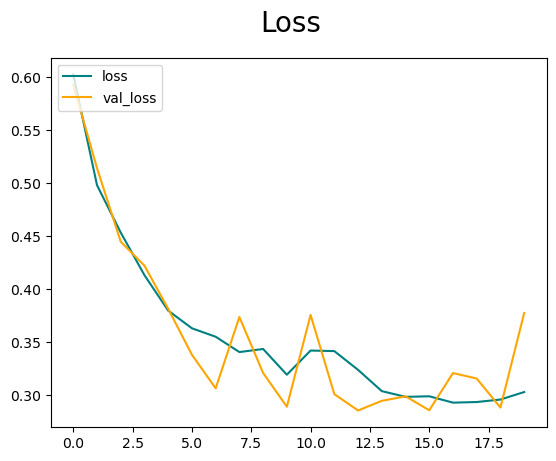

In [18]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [20]:
matriz_no_structured_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TESTING_BI/no_structured"
matriz_structured_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TESTING_BI/structured"
matriz_confusion = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TESTING_BI"

In [ ]:
vali_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/"
train_dir_path = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/TRAINNING_BI/"

In [159]:
aaa = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/no_structured"
bbb = "C:/Users/AXIER/LABS/FINAL_PROYECT/IMAGES/VALIDATION_BI/structured"

In [174]:
checkpoints_path = 'C:/Users/AXIER/LABS/FINAL_PROYECT/red_neuronal_1/save_16.keras'
model.load_weights(checkpoints_path)

In [185]:
len(true_labels)

620

In [184]:
len(pred_labels)

620

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


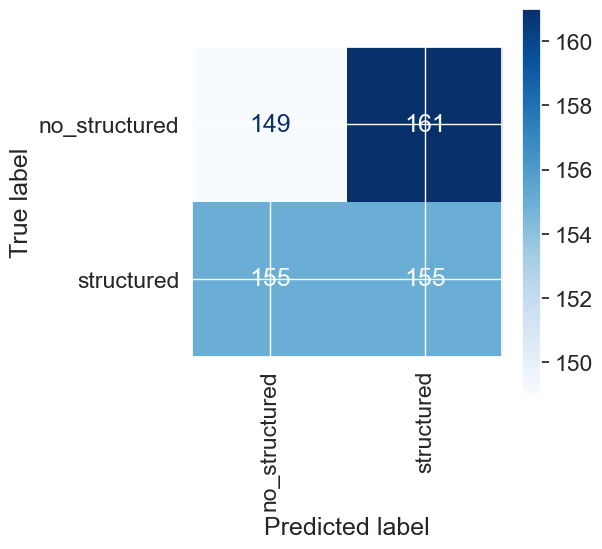

               precision    recall  f1-score     support
no_structured   0.490132  0.480645  0.485342  310.000000
structured      0.490506  0.500000  0.495208  310.000000
accuracy        0.490323  0.490323  0.490323    0.490323
macro avg       0.490319  0.490323  0.490275  620.000000
weighted avg    0.490319  0.490323  0.490275  620.000000


In [190]:
# true labels
true_labels = val_ds.classes

# predictions
predictions = model.predict(val_ds)
pred_labels = (predictions > 0.5).astype('int32')

# compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# class names
class_names = list(val_ds.class_indices.keys())

# plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))  # Increase the size of the figure
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.show()

sns.set(font_scale=1.5)
report = classification_report(true_labels, pred_labels, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# report as a dataframe
print(df_report)